In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
labels = pd.read_csv('unsupervised.csv')
labels.head(10)

,frequence_statuses,visibilite,frequence_friends,aggressivite,nombreUrl,nombrehttp
0,0.003252,0.082857,0.000243,0.000010,0,0
1,0.011237,0.164286,0.000299,0.000033,1,0
2,0.151611,0.245714,0.000136,0.000434,1,0
3,0.001762,0.164286,0.002342,0.000012,2,0
4,0.007965,0.245714,0.000194,0.000023,1,0
5,0.009774,0.000000,0.000071,0.000028,1,0
6,0.037468,0.740000,0.000194,0.000108,1,0
7,0.012834,0.081429,0.000029,0.000037,1,0
8,0.008596,0.164286,0.000599,0.000026,1,0
9,0.120129,0.412857,0.001545,0.000348,2,0


In [46]:
labels[labels['nombreUrl']==5]

,frequence_statuses,visibilite,frequence_friends,aggressivite,nombreUrl,nombrehttp
552,0.01288,0.497143,0.001677,0.000042,5,0


In [33]:
X = np.array(labels[['visibilite', 'aggressivite', 'nombreUrl']].values)
X

array([[8.28571429e-02, 9.98537462e-06, 0.00000000e+00],
       [1.64285714e-01, 3.29590906e-05, 1.00000000e+00],
       [2.45714286e-01, 4.33561740e-04, 1.00000000e+00],
       ...,
       [2.47142857e-01, 1.52108484e-05, 1.00000000e+00],
       [3.30000000e-01, 2.57594448e-04, 1.00000000e+00],
       [4.08571429e-01, 2.77371125e-04, 0.00000000e+00]])

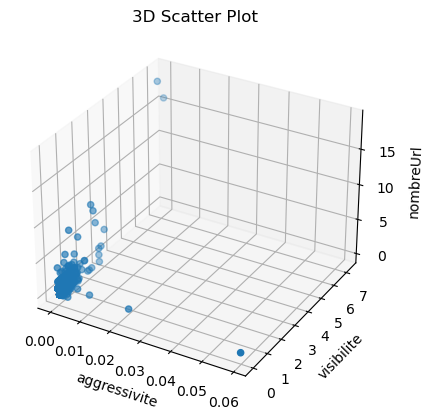

In [34]:
# create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the data
ax.scatter(labels['aggressivite'], labels['visibilite'], labels['nombreUrl'])

# set labels and title
ax.set_xlabel('aggressivite')
ax.set_ylabel('visibilite')
ax.set_zlabel('nombreUrl')
ax.set_title('3D Scatter Plot')

# show the plot
plt.show()


In [35]:
clustering = KMeans(n_clusters=2)
clustering.fit(X)

KMeans(n_clusters=2)

In [36]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

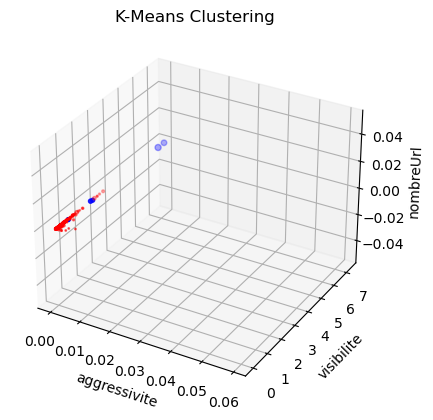

array([[8.28571429e-02, 9.98537462e-06, 0.00000000e+00],
       [1.64285714e-01, 3.29590906e-05, 1.00000000e+00],
       [2.45714286e-01, 4.33561740e-04, 1.00000000e+00],
       ...,
       [2.47142857e-01, 1.52108484e-05, 1.00000000e+00],
       [3.30000000e-01, 2.57594448e-04, 1.00000000e+00],
       [4.08571429e-01, 2.77371125e-04, 0.00000000e+00]])

In [44]:
colors = ['r', 'b']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(clustering.cluster_centers_)):
    plt.scatter(X[clustering.labels_ == i, 1], X[clustering.labels_ == i, 0], 
                X[clustering.labels_ == i, 2] , color=colors[i])
# set the axis labels and title
ax.set_xlabel('aggressivite')
ax.set_ylabel('visibilite')
ax.set_zlabel('nombreUrl')
plt.title('K-Means Clustering')
# show the plot
plt.show()
X